# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import random
import matplotlib 
import numpy as np
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
dice = [1, 2, 3, 4, 5, 6]
dice_rolls = pd.DataFrame(random.choices(dice, k=10))
dice_rolls.columns = ['Final']
dice_rolls

,Final
0,6
1,3
2,2
3,2
4,4
5,6
6,5
7,4
8,2
9,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a4b5d0>]],
      dtype=object)

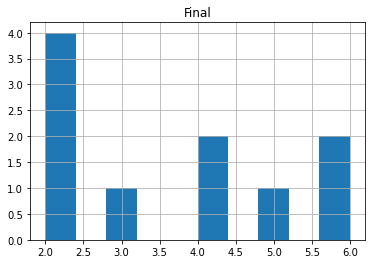

In [3]:
#Plot the results sorted by value
sorted = dice_rolls.sort_values(by=['Final'], ascending=True)
sorted.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
freq = sorted.Final.value_counts()
freq

2    4
6    2
4    2
5    1
3    1
Name: Final, dtype: int64

'\nThe original histogram plot is already a frequency distribution. \n'

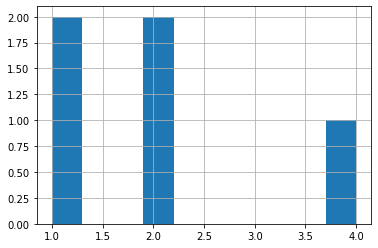

In [5]:
freq.hist()

"""
The original histogram plot is already a frequency distribution. 
"""

#When I try to plot a frequency distribution numbers it is taking my value counts and 
#plotting them on x-axis and for y-axis it is plotting how many times they appear in a 
#column which is not what I want.


In [6]:
list_of_rolls = []
list_of_rolls = sorted['Final'].tolist()
list_of_rolls

[2, 2, 2, 2, 3, 4, 4, 5, 6, 6]

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def mean(num_list):
    return sum(num_list)/len(num_list)
 
mean(list_of_rolls) 
#mean(sorted['Final'])

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def freq_dist(num_list):
    freq = {}
    for item in num_list:
        if item not in freq:
            freq[item] = 1
        else:
            freq[item] = freq[item]+1

    for key,value in freq.items():
        print(str(key)+':'+str(value))
    
    return freq

freq_dist(list_of_rolls)
#freq_dist(sorted['Final'])

2:4
3:1
4:2
5:1
6:2


{2: 4, 3: 1, 4: 2, 5: 1, 6: 2}

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
from statistics import median
median([2,5,6,8,9])

6

In [76]:
def median(numbers):
    #print('numbers', numbers)
    numbers.sort()
    if len(numbers)%2 ==1:
        return numbers[int((len(numbers)-1)/2)]
    else:
        indexFirst = int(len(numbers)/2)-1
        indexSecond = int(len(numbers)/2)
        return (numbers[indexFirst]+numbers[indexSecond])/2

median(list_of_rolls)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [78]:
# your code here
def quartiles(numbers):
    numbers.sort()
    output = {}
    output ['50th'] = median(numbers)
    output ['100th'] = numbers[-1]
    
    if len(numbers)%2 ==1:
        middleElement = int((len(numbers)-1)/2)
        output ['25th'] = median(numbers[0:middleElement])
        output ['75th'] = median(numbers[middleElement + 1:])    
    else:
        endOfFirstHalf = int(len(numbers)/2)
        output ['25th'] = median(numbers[0:endOfFirstHalf])
        output ['75th'] = median(numbers[endOfFirstHalf:len(numbers)])
    return output

quartiles(list_of_rolls)

{'50th': 3.5, '100th': 6, '25th': 2, '75th': 5}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

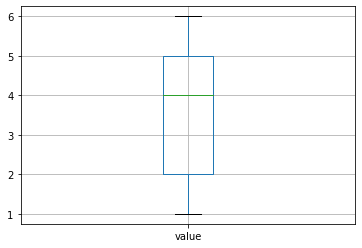

In [108]:
dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_100 = dice_100[['roll','value']]
dice_100 = dice_100.sort_values(by=['value'])
dice_100[['value']].boxplot()

In [143]:
"""
75% of the rolls are between the numbers 2 and 5
"""

'\n75% of the rolls are between the numbers 2 and 5\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [109]:
mean(dice_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [110]:
freq_dist(dice_100['value'])

1:12
2:17
3:14
4:22
5:12
6:23


{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Mean is 3.74


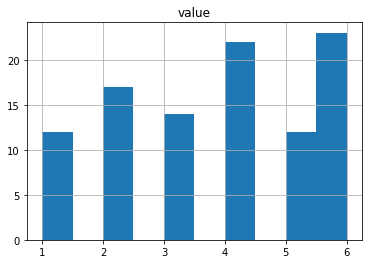

In [119]:
dice_100[['value']].hist()
print('Mean is', mean(dice_100['value']))

In [142]:
"""
The weighted average of columns on the histogram. 
"""

'\nThe weighted average of columns on the histogram. \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

Mean is 3.447


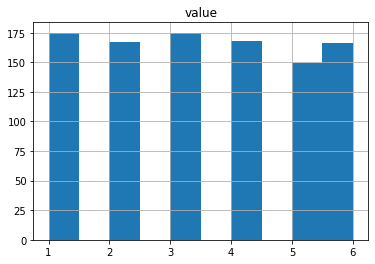

In [118]:
dice_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_1000 = dice_1000[['roll','value']]
dice_1000 = dice_1000.sort_values(by=['value'])
dice_1000[['value']].hist()
print('Mean is', mean(dice_1000['value']))

In [141]:
"""
Not much is changed, mean for 1000 rolls is very close to the mean for 100 rolls of die.
"""

'\nNot much is changed, mean for 1000 rolls is very close to the mean for 100 rolls of die.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a412a50>]],
      dtype=object)

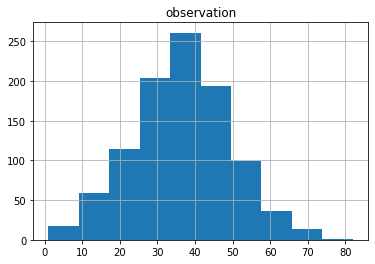

In [145]:
pop1 = pd.read_csv('../data/ages_population.csv')
pop1.hist()
#I am guessing that mean is about 36 and standard deviation range is from 22 to 50, so 14 from the mean.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [138]:
print('Mean is', mean(pop1['observation']))
pop1.describe().transpose()

Mean is 36.56


,count,mean,std,min,25%,50%,75%,max
observation,1000.0,36.56,12.8165,1.0,28.0,37.0,45.0,82.0


In [140]:
"""
I was very close with the mean, I guessed 36 and it was 36.56. I also guessed 14 as my standard deviation and it was 12. 
"""

'\nI was very close with the mean, I guessed 36 and it was 36.56. I also guessed 14 as my standard deviation and it was 12. \n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a583bd0>]],
      dtype=object)

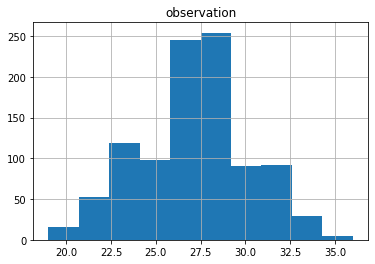

In [146]:
pop2 = pd.read_csv('../data/ages_population2.csv')
pop2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [160]:
"""
The range of the ages is smaller about 15 compare to the range of 60 in step 1. Further, values are clustered around the mean which may lead to a smaller number for standard deviation.
"""

'\nThe range of the ages is smaller about 15 compare to the range of 60 in step 1. Further, values are clustered around the mean which may lead to a smaller number for standard deviation.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [148]:
pop2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
observation,1000.0,27.155,2.969814,19.0,25.0,27.0,29.0,36.0


In [158]:
"""
The average population is younger 27 years of age compare to 36 in step 2. Also, standard deviation is much smaller 2.9 compare to 12.8 in step 2 signifying that more values are centered around the mean.
"""

'\nThe average population is younger 27 years of age compare to 36 in step 2. Also, standard deviation is much smaller 2.9 compare to 12.8 in step 2 signifying that more values are centered around the mean.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a67aa90>]],
      dtype=object)

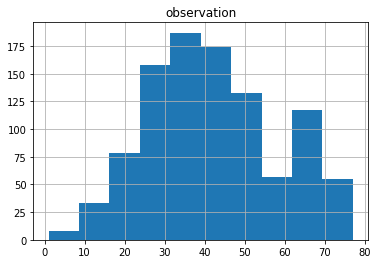

In [153]:
pop3 = pd.read_csv('../data/ages_population3.csv')
pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [154]:
pop3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
observation,1000.0,41.989,16.144706,1.0,30.0,40.0,53.0,77.0


In [157]:
"""
The average population is older 41 years of age compare to 36 in step 1. Also, standard deviation is 16 compare to 12.8 in step 1 signifying that values are more spread out from the mean.
"""

'\nThe average population is older 41 years of age compare to 36 in step 1. Also, standard deviation is 16 compare to 12.8 in step 1 signifying that values are more spread out from the mean.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [164]:
pop3['observation'].quantile(0.25)

30.0

In [166]:
pop3['observation'].median()

40.0

In [165]:
pop3['observation'].quantile(0.75)

53.0

In [170]:
pop3['observation'].quantile(1)

77.0

In [31]:
"""
The mean is 41.989 and the median is 40 are almost the same numbers which means that age population for this neighborhood is very balanced.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [171]:
pop3['observation'].quantile(0.10)

22.0

In [172]:
pop3['observation'].quantile(0.90)

67.0

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'